# House Price Prediction

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('display.max_columns',500)

### Data Set - House Price

In [2]:
df=pd.read_csv("train.csv")

In [3]:
#Looking at the data set
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Variable Analysis

In [4]:
#Deleting id variable
del df["Id"]

In [5]:
#Categorical Variables
cat_var=df.select_dtypes(include=["object"]).columns

In [6]:
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
#Numeric Variable
num_var=df.select_dtypes(include=["float64",'int64']).columns

In [8]:
print(" Total Columns :{} \n Total Numeric Columns :{} \n Total Alphanumeric Columns:{}".format(len(cat_var)+len(num_var),
                                                                                               len(num_var),len(cat_var)))

 Total Columns :80 
 Total Numeric Columns :37 
 Total Alphanumeric Columns:43


### Analysing Numeric Variables

####  Correlation Analysis

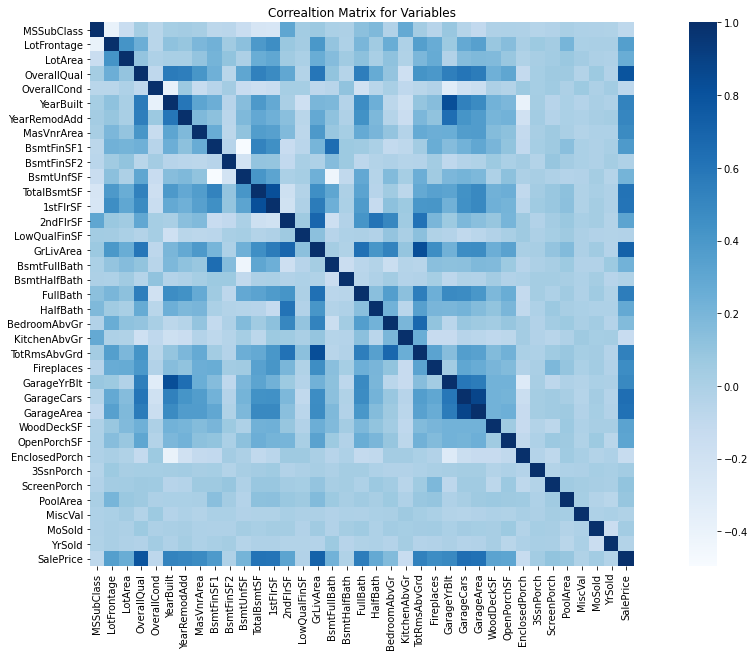

In [9]:
corr_mat=df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_mat,square= True,cmap="Blues")
plt.title("Correaltion Matrix for Variables")
plt.show()

In [132]:
# Variables Highly correlated with Sales Price
# Selecting Highly Correlated Variables with threshold of 0.5
top_num_feat = corr_mat[["SalePrice"]].sort_values(by="SalePrice",ascending = False)[corr_mat["SalePrice"]> 0.5]
top_num_feat

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#### Analysing Top Variables 

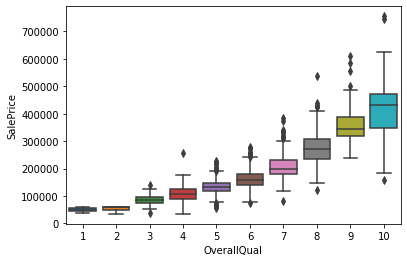

In [133]:
# OverallQual
# Var Description :Rates the overall condition of the house range(0 - 10 with step of 1)
sns.boxplot(x= df["OverallQual"],y=df["SalePrice"])
plt.show()

**Price of the House Increases with Increase in OverAll Quality**

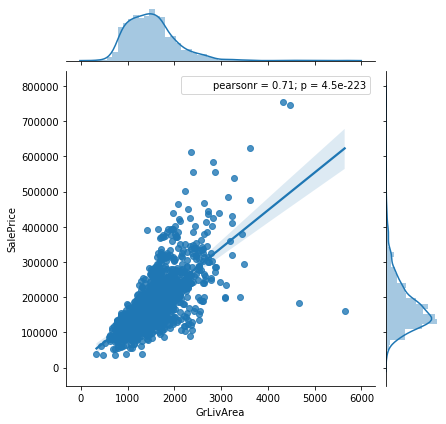

In [134]:
# Var :GrLivArea
# Var Description: Above grade (ground) living area square feet
sns.jointplot(x=df["GrLivArea"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

***The price of the house should increase with Area ideally, but we can see there are two data points above 4000 GR Area and Having price less than 300000*** 
<br>
***This outlier should be removed***

In [135]:
df = df.drop(df[ (df['SalePrice']<300000) & (df['GrLivArea']>4000)].index).reset_index(drop=True)

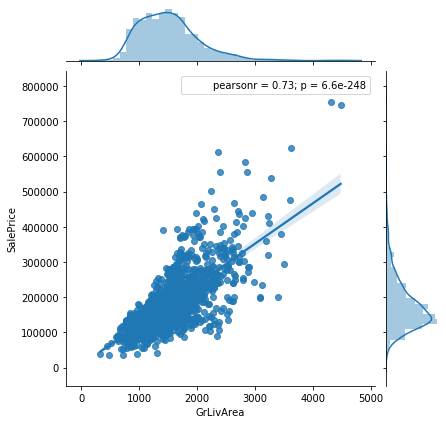

In [136]:
sns.jointplot(x=df["GrLivArea"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

In [137]:
# Var :GarageCars
# Var Description: Size of garage in car capacity

# Looking at Unique Values of GarageCars
df[["GarageCars","SalePrice"]].groupby("GarageCars").agg(['count','mean','median'])

SalePrice                         
               count           mean    median
GarageCars                                   
0                 81  103317.283951  100000.0
1                369  128116.688347  128000.0
2                823  183880.645200  178000.0
3                180  310329.933333  295246.5
4                  5  192655.800000  200000.0

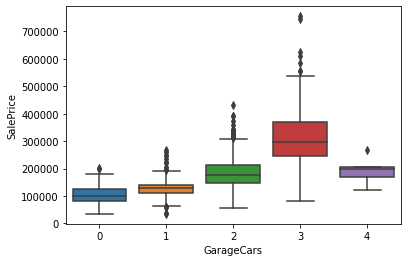

In [138]:
# Visualizing the var
sns.boxplot(x=df["GarageCars"],y=df["SalePrice"])
plt.show()

***Looking at the above distribution , the price of the house should increase with no of Garage Cars <br>but the mean price has decresed when the no of Garage Cars has increased from 3 to 4 the price of the house has actually decresed in the data.<br>This shows that No of Graage 4 are an outlier to the data and the count of the data is on 5 records so removing the outlier should not create any impact***

In [139]:
#Removing Outliers for GarageCars
df = df.drop(df[(df['GarageCars']>3) & (df['SalePrice']<300000)].index).reset_index(drop=True)

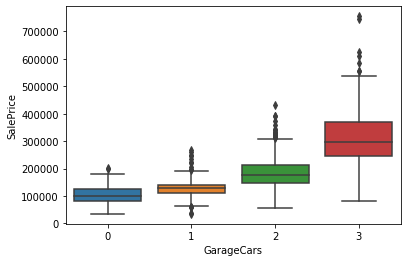

In [140]:
# Visualizing the var
sns.boxplot(x=df["GarageCars"],y=df["SalePrice"])
plt.show()

***Now the Relationship with GarageCars and SalePrice means sense with increasing mean***

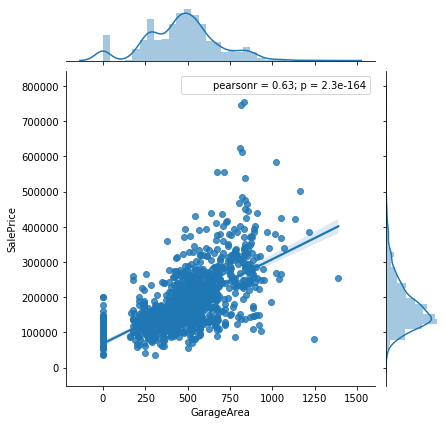

In [141]:
# Var : GarageArea
# Var Description :Size of garage in square feet
sns.jointplot(x=df["GarageArea"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

**There are two points above GarageArea 1100 and SalesPrice less than 300000 are looking to be outliers and needs to be treated**

In [142]:
#Removing Outliers for GarageCars
df = df.drop(df[(df['GarageArea']>1100) & (df['SalePrice']<300000)].index).reset_index(drop=True)

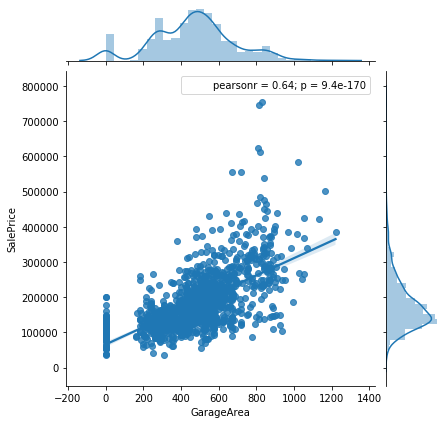

In [143]:
sns.jointplot(x=df["GarageArea"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

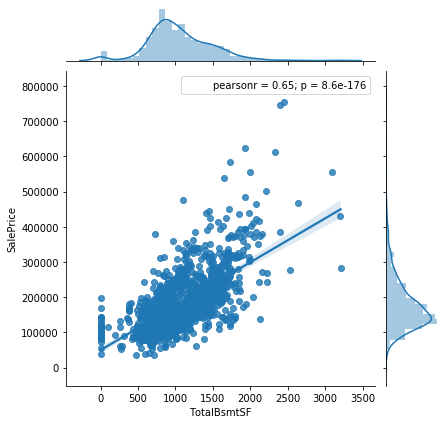

In [144]:
# Var : TotalBsmtSF
# Var description: Total square feet of basement area
sns.jointplot(x=df["TotalBsmtSF"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

**Total Basement area data looks good without any outlier**

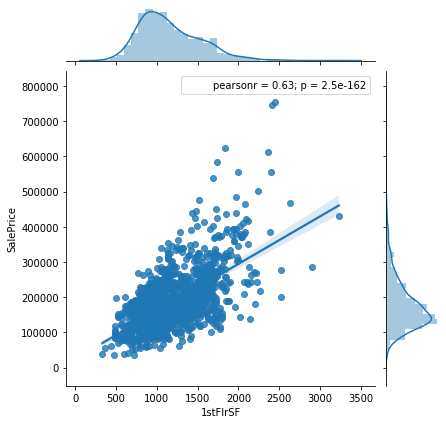

In [145]:
#Var: 1stFlrSF
#Var description: First Floor square feet
sns.jointplot(x=df["1stFlrSF"],y=df["SalePrice"],kind="reg").annotate(stats.pearsonr)
plt.show()

**First Floor Square foot has a linear relationship with SalePrice with no Outliers**

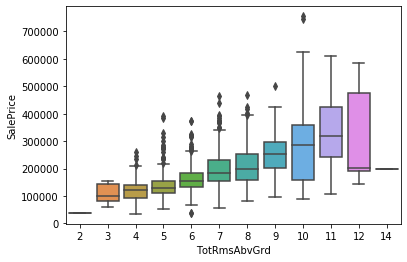

In [146]:
# Var:TotRmsAbvGrd
# Var: Total rooms above grade (does not include bathrooms)
sns.boxplot(x=df["TotRmsAbvGrd"],y=df["SalePrice"])
plt.show()

**Rooms above Ground - 14 seems to be an outlier needs to be treated**

In [147]:
df = df.drop(df[(df['TotRmsAbvGrd']>13)].index).reset_index(drop=True)

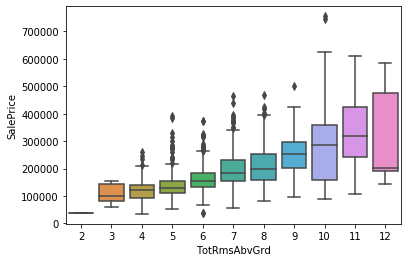

In [148]:
sns.boxplot(x=df["TotRmsAbvGrd"],y=df["SalePrice"])
plt.show()

In [149]:
# Var : YearBuilt
# Var Description: Original construction date
year_mean_sp=df[["YearBuilt","SalePrice"]].groupby("YearBuilt").mean()

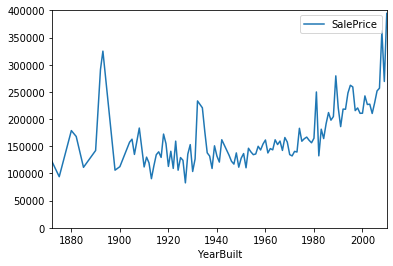

In [150]:
year_mean_sp.plot()
plt.ylim(0,400000)
plt.show()

**SalePrice of House increases for recently built property**

In [151]:
#Var : YearRemodAdd
# Var Description:Remodel date (same as construction date if no remodeling or additions)
year_mean_sp=df[["YearRemodAdd","SalePrice"]].groupby("YearRemodAdd").mean()

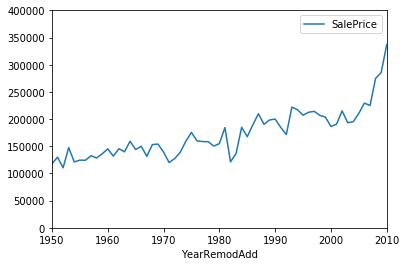

In [152]:
year_mean_sp.plot()
plt.ylim(0,400000)
plt.show()

**SalePrice of House increases for recently remodeled property**

### Missing Value 

In [153]:
# Percentage of Missing Values
missing_values = df.isna().sum()/len(df) * 100
missing_values = missing_values.drop(missing_values[missing_values == 0].index)
missing_values.sort_values(ascending = False)

PoolQC          99.586207
MiscFeature     96.344828
Alley           93.862069
Fence           80.689655
FireplaceQu     47.241379
LotFrontage     17.793103
GarageYrBlt      5.517241
GarageType       5.517241
GarageFinish     5.517241
GarageQual       5.517241
GarageCond       5.517241
BsmtFinType2     2.620690
BsmtExposure     2.620690
BsmtFinType1     2.551724
BsmtCond         2.551724
BsmtQual         2.551724
MasVnrArea       0.551724
MasVnrType       0.551724
Electrical       0.068966
dtype: float64

**There are total 19 columns in which missing data is there and needs to be treated**

In [154]:
# deleting columns with NAN more than 50%
df.drop(["PoolQC","MiscFeature","Alley","Fence"],axis =1,inplace=True)

In [155]:
# Handling Columns with Missing Value < 50%
df["FireplaceQu"].fillna("None",inplace=True)
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(0,inplace=True)

In [156]:
replace_none=['GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure',
             'BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']
for col in replace_none:
    df[col].fillna("None",inplace=True)

In [157]:
df["MasVnrArea"].fillna(0,inplace=True)

In [158]:
df["Electrical"].fillna(df["Electrical"].mode()[0],inplace=True)

In [159]:
missing_values = df.isna().sum()/len(df) * 100
missing_values = missing_values.drop(missing_values[missing_values == 0].index)
missing_values.sort_values(ascending = False)

Series([], dtype: float64)

###  Feature Engineering

In [160]:
#YrSold  converted to Categorical Feature
df["YrSold"]=df["YrSold"].apply(str)
#MoSold covnerted to Categorical Feature
df["MoSold"]=df["MoSold"].apply(str)
#MSSubClass converted to Categorical Feature
df['MSSubClass'] = df['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

In [161]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
# Process columns and apply LabelEncoder to categorical features
for col in cols:
    label = LabelEncoder()  
    df[col] = label.fit_transform(list(df[col].values))

### Analysing Sales Price Variable

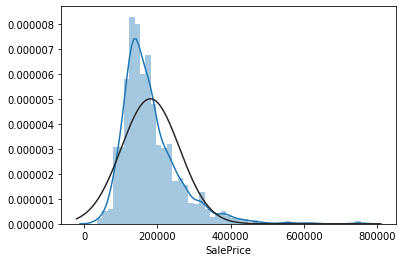

In [162]:
# Distribuiton of SalesPrice
sns.distplot(df['SalePrice'] , fit=norm)
plt.show()

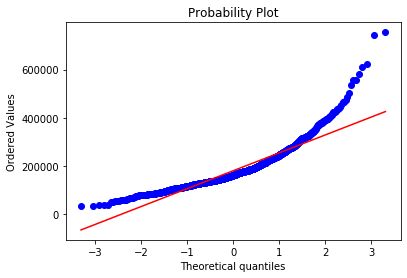

In [163]:
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

***SalePrice is skewed in nature,using log transformation***

In [164]:
df["SalePrice"]=np.log1p(df["SalePrice"])

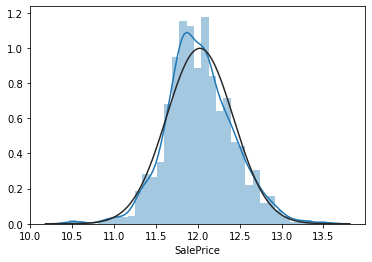

In [165]:
sns.distplot(df['SalePrice'] , fit=norm)
plt.show()

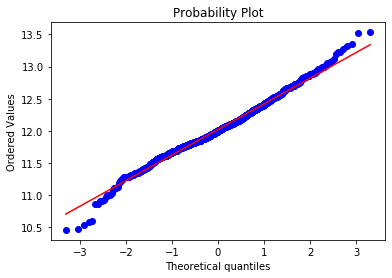

In [166]:
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### Analysing Other Skewed Variables

In [167]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,24.396426
PoolArea,15.888245
LotArea,12.600105
3SsnPorch,10.257488
LowQualFinSF,9.226657


### Selecting All Variable with Skewness  > 0.70

In [168]:
skewness = skewness[abs(skewness) > 0.70]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
alpha = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], alpha)
    df[feat] += 1

There are 56 skewed numerical features to Box Cox transform


### Analyzing Remaining Categorical Var

In [169]:
cat_var =df.select_dtypes(include=["object"]).columns
for col in cat_var:
    print("{} : {}".format(col,len(pd.unique(df[col]))))

MSZoning : 5
LandContour : 4
Utilities : 2
LotConfig : 5
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 7
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
Foundation : 6
Heating : 6
Electrical : 5
GarageType : 7
SaleType : 9
SaleCondition : 6


In [170]:
#Dropping Var with more than 4 Unique Values
#df.drop(["MSZoning","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle",
#        "RoofMatl","Exterior1st","Exterior2nd","Foundation","Heating","Electrical","GarageType","SaleType","SaleCondition"],inplace=True,axis=1)

df.drop(['Exterior1st','Exterior2nd','Neighborhood'],axis=1,inplace=True)

In [171]:
cat_var =df.select_dtypes(include=["object"]).columns
cat_var

Index(['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [172]:
for col in cat_var:
    dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([col],axis=1,inplace=True)

In [173]:
df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.750250,6.831328,20.212182,1.730463,2.540963,1.0,3.440268,2.820334,15.187527,15.187527,9.059126,2.194318,2.820334,2.194318,2.820334,2.540963,2.194318,12.170327,3.259674,1.0,8.483296,12.692623,1.000000,1.730463,12.692623,12.686189,1.0,14.698888,1.730463,1.000000,2.194318,1.730463,2.540963,1.730463,2.194318,3.602594,3.259674,1.000000,2.540963,15.187527,2.194318,2.194318,11.506271,3.055642,3.055642,2.194318,1.000000,6.714669,1.000000,1.0,1.0,1.0,1.0,2.820334,2.194318,4.156009,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2.820334,7.221214,20.712205,1.730463,2.540963,1.0,3.259674,3.440268,15.145138,15.145138,1.000000,2.540963,2.820334,2.194318,2.820334,1.730463,1.000000,13.062832,3.259674,1.0,9.897844,13.792276,1.000000,1.730463,13.792276,1.000000,1.0,13.792276,1.000000,1.730463,2.194318,1.000000,2.540963,1.730463,2.540963,3.259674,3.259674,1.730463,3.055642,15.145138,2.194318,2.194318,11.062098,3.055642,3.055642,2.194318,10.010206,1.000000,1.000000,1.0,1.0,1.0,1.0,3.440268,1.730463,4.140516,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3.750250,6.914940,21.347241,1.730463,1.000000,1.0,3.440268,2.820334,15.184404,15.185966,8.646538,2.194318,2.820334,2.194318,2.820334,2.194318,2.194318,11.200343,3.259674,1.0,10.917060,12.892039,1.000000,1.730463,12.892039,12.724598,1.0,14.832085,1.730463,1.000000,2.194318,1.730463,2.540963,1.730463,2.194318,3.259674,3.259674,1.730463,3.055642,15.184404,2.194318,2.194318,11.775536,3.055642,3.055642,2.194318,1.000000,6.053371,1.000000,1.0,1.0,1.0,1.0,4.011340,2.194318,4.163719,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3.885846,6.684507,20.691553,1.730463,1.000000,1.0,3.440268,2.

### Train - Test Split 

In [174]:
from sklearn.model_selection import train_test_split
y=df["SalePrice"]
x=df.drop(["SalePrice"],axis =1 )
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [175]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [176]:
X_train.shape

(971, 140)

### Lasso Regression 

In [177]:
train_model_metric=[]
test_model_metric=[]
alpha=[]
for alp in range(1,100):
    alp=alp/10000
    alpha.append(alp)
    model=linear_model.Lasso(alpha=alp)
    model.fit(X_train,y_train)
    train_error=-metrics.mean_squared_error(y_train,model.predict(X_train))
    train_model_metric.append(train_error)
    test_model_metric.append(-metrics.mean_squared_error(y_test,model.predict(X_test)))

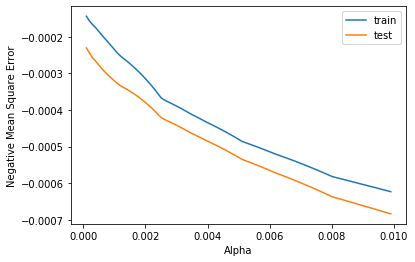

In [178]:
sns.lineplot(alpha,train_model_metric,label="train")
sns.lineplot(alpha,test_model_metric,label="test")
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Square Error")
plt.legend(loc="best")
plt.show()

**As the difference between error of train and test start increasing after alpha = 0.02 selecting it as the alpha for the model**

In [195]:
Lasso_estimator = linear_model.Lasso(alpha=0.002)
Lasso_estimator.fit(X_train,y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
print("Lasso Train R2 Score:",round(metrics.r2_score(y_train,Lasso_estimator.predict(X_train)),2))
print("Lasso Test R2 Score:",round(metrics.r2_score(y_test,Lasso_estimator.predict(X_test)),2))


Lasso Train R2 Score: 0.84
Lasso Test R2 Score: 0.82


In [197]:
selected_col = []
for col,coef in zip(X_train.columns,Lasso_estimator.coef_):
    if coef!= 0 :
        selected_col.append((col,round(coef,5)))
print("Total Selected Columns :",len(selected_col))
print(selected_col)

Total Selected Columns : 18
[('LotArea', 0.00234), ('OverallQual', 0.01129), ('MasVnrArea', 0.00078), ('BsmtQual', -0.00707), ('BsmtFinSF1', 0.00096), ('BsmtFinSF2', -0.0001), ('TotalBsmtSF', 0.00203), ('HeatingQC', -0.00513), ('1stFlrSF', 0.00311), ('GrLivArea', 0.01569), ('KitchenQual', -0.00225), ('GarageFinish', -0.00231), ('GarageArea', 0.00276), ('WoodDeckSF', 0.00089), ('OpenPorchSF', 0.00112), ('EnclosedPorch', -0.00052), ('ScreenPorch', 0.0004), ('Foundation_PConc', 0.00368)]


### Ridge Regression 

In [182]:
train_model_metric=[]
test_model_metric=[]
alpha=[]
for alp in range(1,1000):
    #alp=alp/
    alpha.append(alp)
    model=linear_model.Ridge(alpha=alp)
    model.fit(X_train,y_train)
    train_error=-metrics.mean_squared_error(y_train,model.predict(X_train))
    train_model_metric.append(train_error)
    test_model_metric.append(-metrics.mean_squared_error(y_test,model.predict(X_test)))

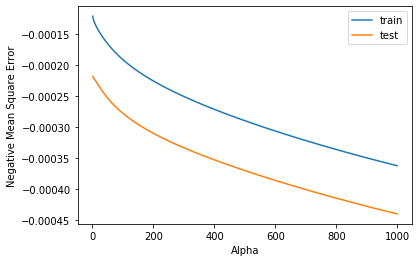

In [183]:
sns.lineplot(alpha,train_model_metric,label="train")
sns.lineplot(alpha,test_model_metric,label="test")
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Square Error")
plt.legend(loc="best")
plt.show()

**As the difference between error of train and test start increasing after alpha = 0.02 selecting it as the alpha for the model**

In [184]:
Ridge_estimator = linear_model.Ridge(alpha=100)
Ridge_estimator.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [185]:
print("Ridge Train R2 Score:",round(metrics.r2_score(y_train,Ridge_estimator.predict(X_train)),2))
print("Ridge Test R2 Score:",round(metrics.r2_score(y_test,Ridge_estimator.predict(X_test)),2))

Ridge Train R2 Score: 0.9
Ridge Test R2 Score: 0.87


## <u>Final Outcome</u>

**We have selected <u>Lasso Regression Model</u> to  Model the House Price <br> Total Feature select to Model Price : 18 <br> Below are the Top 5 features that are important for the Price Prediction**

**['GrLivArea', 'OverallQual', 'Foundation_PConc', '1stFlrSF', 'GarageArea']**

**Model R2 for Train Set is :0.84 <br> Model R2 for Test Set is : 0.82**

###  Creating Lasso without Top 5 Variable

In [189]:
select_col_lasso = dict(selected_col)
sort_columns = sorted(select_col_lasso.items(), key=lambda x: x[1], reverse=True)
columns_removed=sort_columns[0:5]
columns_removed =[c[0] for c in columns_removed]
columns_removed

['GrLivArea', 'OverallQual', 'Foundation_PConc', '1stFlrSF', 'GarageArea']

In [190]:
X_train_new=X_train.drop(columns_removed,axis=1)
Lasso_estimator = linear_model.Lasso(alpha=0.002)
Lasso_estimator.fit(X_train_new,y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [192]:
selected_col = []
for col,coef in zip(X_train_new.columns,Lasso_estimator.coef_):
    if coef!= 0 :
        selected_col.append((col,round(coef,5)))
print("Total Selected Columns :",len(selected_col))
print(selected_col)

Total Selected Columns : 21
[('LotArea', 0.00467), ('MasVnrArea', 0.00154), ('BsmtQual', -0.01311), ('BsmtFinSF1', 0.00083), ('BsmtFinSF2', -0.0), ('BsmtUnfSF', 9e-05), ('TotalBsmtSF', 0.0035), ('HeatingQC', -0.00636), ('2ndFlrSF', 0.00122), ('KitchenQual', -0.00849), ('Fireplaces', 0.00614), ('GarageYrBlt', 0.00169), ('GarageFinish', -0.00365), ('GarageCars', 0.00465), ('WoodDeckSF', 0.00115), ('OpenPorchSF', 0.00195), ('EnclosedPorch', -0.00044), ('ScreenPorch', 0.00074), ('MiscVal', -0.00032), ('Foundation_CBlock', -0.00135), ('GarageType_Attchd', 0.00099)]


In [193]:
select_col_lasso = dict(selected_col)
sort_columns = sorted(select_col_lasso.items(), key=lambda x: x[1], reverse=True)
new_top5=sort_columns[0:5]

In [198]:
# New Top 5 Feature
new_top5

[('Fireplaces', 0.00614),
 ('LotArea', 0.00467),
 ('GarageCars', 0.00465),
 ('TotalBsmtSF', 0.0035),
 ('OpenPorchSF', 0.00195)]

In [10]:
from sklearn.preprocessing import LabelEncoder
#Encode target labels with value between 0 and n_classes-1.
#This transformer should be used to encode target values, i.e. y, and not the input X

In [14]:
column = ['M','F','M','M','M','F','T','T','T']

In [15]:
encoder =LabelEncoder()

In [16]:
encoder.fit_transform(column)

array([1, 0, 1, 1, 1, 0, 2, 2, 2], dtype=int64)